# [DEMO] Kalman smoothers



In [1]:
using LinearAlgebra
using Distributions
using ProgressMeter
using Random
using Plots
default(label="", grid=false, margin=10Plots.pt)

In [2]:
include("../util/gen_data.jl");
include("../kalman-smoothers.jl");

#### Generate data

In [3]:
# Time horizon
T = 60

# Dimensionalities
Dx = 2
Dy = 1

# Time step
Δt = 0.1

# Experimental parameters
A = [1. Δt;
     0  1.]
C = [1. 0]

# Noises
qc = 0.1
Q = [Δt^2*qc 0.;0. Δt*qc]
R = 0.01

# Start state
px0 = (zeros(2), Matrix{Float64}(I,Dx,Dx))

# Generate signal
observations, states = LGDS(A,C,Q,R, px0[1], T=T);

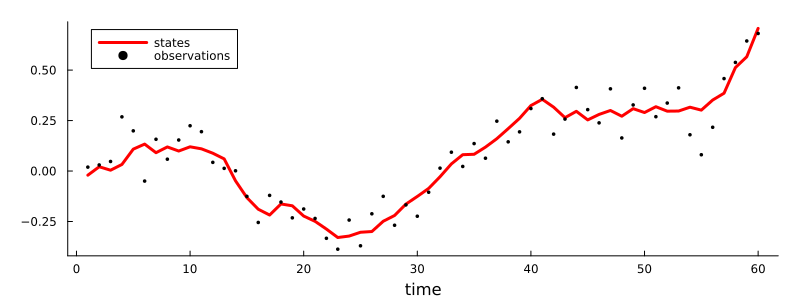

In [4]:
# Check signal visually
plot(1:T, states[1,:], linewidth=3, color="red", label="states", xlabel="time", size=(800,300))
scatter!(1:T, observations, markersize=2, color="black", label="observations")

### Inference

In [7]:
# Fixed-interval Rauch-Tung-Striebel smoother
mx,Px = rts_smoother(observations, A,C,Q,R, px0);

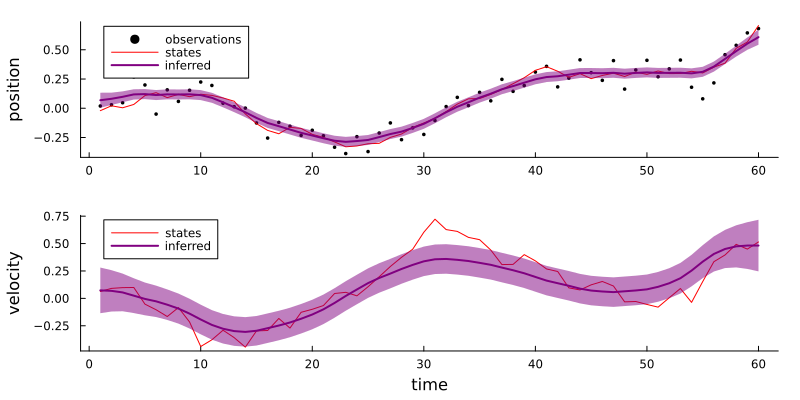

In [8]:
p101 = scatter(1:T, observations, markersize=2, color="black", label="observations")
plot!(1:T, states[1,:], lw=1, color="red", label="states", ylabel="position", legend=:topleft)
plot!(1:T, mx[1,:], ribbon=sqrt.(Px[1,1,:]), lw=2, color="purple", label="inferred")

p102 = plot(1:T, states[2,:], lw=1, color="red", label="states", xlabel="time", ylabel="velocity", legend=:topleft)
plot!(1:T, mx[2,:], ribbon=sqrt.(Px[2,2,:]), lw=2, color="purple", label="inferred")

plot(p101,p102, layout=(2,1), size=(800,400))